## Bearing Fault Detection Using ANN on Vibration Dataset
<pre>
Sayid Mahmud I S
1306622005
Analisis Sinyal Digital
</pre>
---

<pre>
Sumber data:
Korea Advanced Institute of Science and Technology (KAIST) yang diunggah di Mendeley Data
Link : https://data.mendeley.com/datasets/ztmf3m7h5x/1?utm_source
DOI  : https://doi.org/10.1016/j.dib.2023.109049

Detail data yang digunakan:
Dari keseluruhan data yang tersedia, digunakan data vibrasi yang diakuisisi dengan menggunakan 4 sensor accelerometer pada sumbu x dan y, yang diletakkan di housing A dan B
data :
    1. Time series
    2. Accelerometer sumbu x pada housing A
    3. Accelerometer sumbu y pada housing A
    4. Accelerometer sumbu x pada housing B
    5. Accelerometer sumbu y pada housing B

Kondisi Operasi:
Beban yang digunakan: 2 Nm (mesin diberi torsi beban 2 Newton-meter)
1. Kondisi Kerusakan Bearing dan Misalignment
   - BPFI (inner race bearing fault)
   - BPFO (outer race bearing fault)
   - Misalign (ketidaksejajaran poros)

   Untuk ketiga kondisi tersebut:
   - Beban operasi: 2 Nm
   - Tingkat kerusakan: 1.0 mm

2. Kondisi Normal
   - Beban operasi: 2 Nm
   - Kondisi mesin: normal (tanpa kerusakan)

3. Kondisi Unbalance
   - Beban operasi: 2 Nm
   - Jenis kerusakan: unbalance (ketidakseimbangan rotor)
   - Tingkat unbalance: 1751 mg

Banyak data per kelas:
    1. BPFI     : 1.536.000
    2. BPFO     : 1.536.000
    3. Misalign : 3.072.000
    4. Normal   : 7.680.000
    5. Unbalance: 3.072.000

</pre>


![alt text](<Screenshot 2025-12-27 154442.png>)


---

### Preprosesing

#### 1. Konversi data dari format .mat ke .csv dengan mathlab

<pre>
% Folder tempat file .mat
folder = 'D:\Kuliah\123\ASD\PRJ\vibration';  
outputFolder = fullfile(folder, 'csv_export'); 
if ~exist(outputFolder, 'dir')
    mkdir(outputFolder);
end

% Dapatkan daftar file .mat
files = dir(fullfile(folder, '*.mat'));

% Loop tiap file
for k = 1:length(files)
    matFile = fullfile(folder, files(k).name);
    
    % Load file .mat
    data = load(matFile);
    
    % Cek apakah ada field 'Signal'
    if isfield(data, 'Signal')
        Signal = data.Signal;
        
        % Generate x-axis dari x_values
        x_start = Signal.x_values.start_value;
        x_inc   = Signal.x_values.increment;
        N       = Signal.x_values.number_of_values;
        x = x_start + (0:N-1)' * x_inc;  % vektor kolom
        
        % Ambil y-values
        y = Signal.y_values.values;  % [N x 4]
        
        % Buat tabel dengan header
        varNames = {'Time','Channel1','Channel2','Channel3','Channel4'};
        T = table(x, y(:,1), y(:,2), y(:,3), y(:,4), 'VariableNames', varNames);
        
        % Nama file CSV
        [~, name, ~] = fileparts(files(k).name);
        csvName = fullfile(outputFolder, [name '_Signal.csv']);
        
        % Simpan ke CSV
        writetable(T, csvName);
        fprintf('File %s berhasil diekspor ke %s\n', files(k).name, csvName);
    else
        fprintf('File %s tidak memiliki field Signal, dilewati.\n', files(k).name);
    end
end
</pre>

##### 2. Load Data

In [1]:
import pandas as pd
from pathlib import Path

def load_csv_to_separate_dfs(
    folder_path: str,
    pattern: str = "*.csv",
    **read_csv_kwargs
):
    dfs = {}
    for file in Path(folder_path).glob(pattern):
        df = pd.read_csv(file, **read_csv_kwargs)
        key = file.stem 
        dfs[key] = df
    if not dfs:
        raise ValueError("Tidak ada file CSV yang ditemukan")
    return dfs


In [2]:
dataframes = load_csv_to_separate_dfs(
    folder_path="dataset",
    delimiter=",",
    encoding="utf-8"
)


In [3]:
dataframes['BPFI'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1536000 entries, 0 to 1535999
Data columns (total 5 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   Time      1536000 non-null  float64
 1   Channel1  1536000 non-null  float64
 2   Channel2  1536000 non-null  float64
 3   Channel3  1536000 non-null  float64
 4   Channel4  1536000 non-null  float64
dtypes: float64(5)
memory usage: 58.6 MB


In [4]:
dataframes['BPFO'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1536000 entries, 0 to 1535999
Data columns (total 5 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   Time      1536000 non-null  float64
 1   Channel1  1536000 non-null  float64
 2   Channel2  1536000 non-null  float64
 3   Channel3  1536000 non-null  float64
 4   Channel4  1536000 non-null  float64
dtypes: float64(5)
memory usage: 58.6 MB


In [5]:
dataframes['Misalign'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3072000 entries, 0 to 3071999
Data columns (total 5 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Time      float64
 1   Channel1  float64
 2   Channel2  float64
 3   Channel3  float64
 4   Channel4  float64
dtypes: float64(5)
memory usage: 117.2 MB


In [6]:
dataframes['Normal'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7680000 entries, 0 to 7679999
Data columns (total 5 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Time      float64
 1   Channel1  float64
 2   Channel2  float64
 3   Channel3  float64
 4   Channel4  float64
dtypes: float64(5)
memory usage: 293.0 MB


In [7]:
dataframes['Unbalance'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3072000 entries, 0 to 3071999
Data columns (total 5 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Time      float64
 1   Channel1  float64
 2   Channel2  float64
 3   Channel3  float64
 4   Channel4  float64
dtypes: float64(5)
memory usage: 117.2 MB


#### 3. Sliding Window

In [8]:
import numpy as np
import pandas as pd

def build_windowed_feature(
    data_dict: dict[str, pd.DataFrame],
    time_col: str = "Time",
    channel_cols: list[str] = None,
    window_size: int = 2048,
    step_size: int = 512,
    normalize_per_file: str = "zscore",
):
    if channel_cols is None:
        channel_cols = ["Channel1"]

    rows = []

    for label, df in data_dict.items():
        # Ambil array
        t = df[time_col].to_numpy(dtype=np.float64)
        Xch = {col: df[col].to_numpy(dtype=np.float64) for col in channel_cols}

        # Buang baris yg ada NaN di time / channel manapun
        mask = np.isfinite(t)
        for col in channel_cols:
            mask &= np.isfinite(Xch[col])

        t = t[mask]
        for col in channel_cols:
            Xch[col] = Xch[col][mask]

        # Normalisasi per file (per channel)
        if normalize_per_file == "zscore":
            for col in channel_cols:
                x = Xch[col]
                Xch[col] = (x - x.mean()) / (x.std() + 1e-8)

        n = len(t)
        if n < window_size:
            print(f"[SKIP] {label}: panjang {n} < window_size {window_size}")
            continue

        starts = np.arange(0, n - window_size + 1, step_size)
        n_windows = len(starts)

        def make_row(start_idx: int):
            end_idx = start_idx + window_size
            row = {
                "label": label,
                "win_start": int(start_idx),
                "win_end": int(end_idx),
            }

            # Simpan RAW window per channel
            for col in channel_cols:
                row[col] = Xch[col][start_idx:end_idx]

            return row

        for s in starts:
            rows.append(make_row(int(s)))

        print(f"{label:10s} -> total windows={n_windows}")

    return pd.DataFrame(rows)


In [9]:
df_windows = build_windowed_feature(
    data_dict=dataframes,
    time_col="Time",
    channel_cols=['Channel1','Channel2','Channel3','Channel4'],
    window_size=2048,
    step_size=512,
    normalize_per_file="zscore",
)
print(df_windows.shape)
print(df_windows.head())


BPFI       -> total windows=2997
BPFO       -> total windows=2997
Misalign   -> total windows=5997
Normal     -> total windows=14997
Unbalance  -> total windows=5997
(32985, 7)
  label  win_start  win_end  \
0  BPFI          0     2048   
1  BPFI        512     2560   
2  BPFI       1024     3072   
3  BPFI       1536     3584   
4  BPFI       2048     4096   

                                            Channel1  \
0  [-1.0520072383281602, -0.36504389721220915, 0....   
1  [-0.7075876008585142, -0.4840161640376685, -0....   
2  [-2.5602580322973476, -1.583467446715749, -1.9...   
3  [-0.23614821233572386, -0.6249196378800075, -0...   
4  [-0.2257172952793485, -0.12836811107466506, 0....   

                                            Channel2  \
0  [0.9491806480826279, 0.010906071010639139, 0.1...   
1  [0.818224389974924, 0.5415761481318427, -0.010...   
2  [-1.3132663720717692, -0.6079847235345932, 1.0...   
3  [-0.3560154334818788, 0.5225901047968433, 0.78...   
4  [-0.647951264527

In [10]:
df_windows

,label,win_start,win_end,Channel1,Channel2,Channel3,Channel4
0,BPFI,0,2048,"[-1.0520072383281602, -0.36504389721220915, 0....","[0.9491806480826279, 0.010906071010639139, 0.1...","[1.5543848646828047, 1.159699965119109, 1.2285...","[-0.46647311198086, 1.1773029289454895, 0.5861..."
1,BPFI,512,2560,"[-0.7075876008585142, -0.4840161640376685, -0....","[0.818224389974924, 0.5415761481318427, -0.010...","[0.7686457254372884, 1.2611056743514448, 1.383...","[0.12905580641611816, 0.03915401149644645, 0.1..."
2,BPFI,1024,3072,"[-2.5602580322973476, -1.583467446715749, -1.9...","[-1.3132663720717692, -0.6079847235345932, 1.0...","[1.4252436714161547, 0.9126772199916224, 0.334...","[0.6826479010372501, 0.44581543501876286, 0.12..."
3,BPFI,1536,3584,"[-0.23614821233572386, -0.6249196378800075, -0...","[-0.3560154334818788, 0.5225901047968433, 0.78...","[-1.3074483189141757, -0.651608675315699, 0.07...","[-1.2443643302510723, -1.27034174229009, 0.154..."
4,BPFI,2048,4096,"[-0.2257172952793485, -0.12836811107466506, 0....","[-0.6479512645273922, -0.18509263438137444, -0...","[-1.0801414356768637, -0.4192694217357902, 0.0...","[-1.6090021940641912, -1.0442211640406094, 0.1..."
...,...,...,...,...,...,...,...
32980,Unbalance,3067904,3069952,"[-0.9929419843861217, -1.1707701260679346, -1....","[-0.33159525767121134, 0.6197883366404924, -0....","[-0.813241781759919, 0.19961601964352813, 0.20...","[1.11101620722388, -1.2019857533595772, -1.205..."
32981,Unbalance,3068416,3070464,"[1.6911937740606453, 1.0248605437919598, 0.989...","[-0.2959592398774049, -1.2043507576763979, -1....","[-0.5862499243758187, -1.605927223640588, -1.6...","[0.12111360396364203, -1.2947524267374653, -0...."
32982,Unbalance,3068928,3070976,"[-0.969592055623478, 0.19421755165141016, 0.52...","[-0.037843312829607886, -0.6810897808049601, -...","[-0.8587051008354177, -0.09086211544957346, 1....","[0.8586967269444692, -0.32745436097753333, -0...."
32983,Unbalance,3069440,3071488,"[1.2212457341219767, 0.7629726585646295, 0.599...","[-0.5365840939713622, -0.21520606194098177, -1...","[0.10641621553875413, -1.2086102887200647, -0....","[0.20566044552323556, 0.1807073846462718, -1.6..."


### Ekstrkasi Fitur

#### 2. Ekstraksi Fitur Time-Domain (7 fitur)

- RMS  
- Peak-to-Peak  
- Kurtosis  
- Skewness  
- Crest Factor  
- Variance  
- Peak Amplitude  



In [11]:
import numpy as np
import pandas as pd

def extract_time_domain_features(x):
    x = np.asarray(x, dtype=float)
    x = x[~np.isnan(x)]

    if x.size == 0:
        return {
            "rms": np.nan,
            "peak_to_peak": np.nan,
            "kurtosis": np.nan,
            "skewness": np.nan,
            "crest_factor": np.nan,
            "variance": np.nan,
            "peak_amplitude": np.nan,
        }

    mean = x.mean()
    centered = x - mean

    var = np.mean(centered**2)     # population variance (ddof=0)
    std = np.sqrt(var)

    rms = np.sqrt(np.mean(x**2))
    peak_amp = np.max(np.abs(x))
    p2p = np.max(x) - np.min(x)
    crest = peak_amp / rms if rms != 0 else np.inf

    if std == 0:
        skew = 0.0
        kurt = 3.0
    else:
        m3 = np.mean(centered**3)
        m4 = np.mean(centered**4)
        skew = m3 / (std**3)
        kurt = m4 / (std**4)       # raw kurtosis

    return {
        "rms": float(rms),
        "peak_to_peak": float(p2p),
        "kurtosis": float(kurt),
        "skewness": float(skew),
        "crest_factor": float(crest),
        "variance": float(var),
        "peak_amplitude": float(peak_amp),
    }

def extract_features_for_row_arrays(row, channel_cols):
    out = {}
    for i, col in enumerate(channel_cols, start=1):
        x = row[col]  # ini harus array/list per baris
        feats = extract_time_domain_features(x)
        for k, v in feats.items():
            out[f"{k}{i}"] = v
    return out

def build_feature_table_from_windowed_df(
    df_windows: pd.DataFrame,
    channel_cols=None,
    label_col="label",
    keep_cols=None
):

    if channel_cols is None:
        channel_cols = ["Channel1", "Channel2", "Channel3", "Channel4"]

    # validasi kolom
    missing = [c for c in [label_col] + channel_cols if c not in df_windows.columns]
    if missing:
        raise KeyError(f"Kolom tidak ditemukan di df_windows: {missing}")

    keep_cols = keep_cols or []
    missing_keep = [c for c in keep_cols if c not in df_windows.columns]
    if missing_keep:
        raise KeyError(f"keep_cols tidak ditemukan: {missing_keep}")

    rows = []
    for _, row in df_windows.iterrows():
        feats = extract_features_for_row_arrays(row, channel_cols)
        feats[label_col] = row[label_col]
        for c in keep_cols:
            feats[c] = row[c]
        rows.append(feats)

    return pd.DataFrame(rows)


In [12]:
df_time_features = build_feature_table_from_windowed_df(
    df_windows=df_windows,
    channel_cols=["Channel1", "Channel2", "Channel3", "Channel4"],
    label_col="label"
)


In [13]:
df_time_features

,rms1,peak_to_peak1,kurtosis1,skewness1,crest_factor1,variance1,peak_amplitude1,rms2,peak_to_peak2,kurtosis2,...,variance3,peak_amplitude3,rms4,peak_to_peak4,kurtosis4,skewness4,crest_factor4,variance4,peak_amplitude4,label
0,0.981876,8.305892,4.423996,0.042268,4.340398,0.964081,4.261734,0.972464,8.739176,5.629462,...,0.984028,3.648282,0.967967,6.417071,2.811386,0.015100,3.410602,0.936960,3.301350,BPFI
1,0.991872,8.305892,4.302017,0.047775,4.296657,0.983810,4.261734,0.958536,8.043896,5.120673,...,0.988448,3.648282,0.960225,5.920551,2.731196,0.008929,3.438100,0.922030,3.301350,BPFI
2,1.008603,8.305892,4.415494,0.038160,4.225383,1.017277,4.261734,0.957074,8.421186,5.110447,...,1.030858,3.649781,0.962300,5.624739,2.705114,0.008558,3.123284,0.925986,3.005537,BPFI
3,0.983682,8.305892,4.538889,0.059166,4.332431,0.967628,4.261734,0.969229,8.421186,5.536860,...,0.989271,3.649781,0.966326,6.738645,2.785218,0.003069,3.963473,0.933776,3.830006,BPFI
4,0.983058,7.685130,4.313403,0.044689,4.306242,0.966404,4.233287,0.957961,8.381597,5.101458,...,1.013529,3.649781,0.965665,6.877032,2.876359,0.003449,3.966186,0.932498,3.830006,BPFI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32980,0.976982,6.972535,3.320791,-0.028494,3.702667,0.954489,3.617440,0.998422,7.559903,3.131771,...,0.912666,3.674150,0.991873,6.062126,2.426167,0.031195,3.111671,0.983510,3.086382,Unbalance
32981,0.965918,6.972535,3.340193,-0.033370,3.745081,0.932984,3.617440,1.001850,7.272690,3.054851,...,0.933048,3.674150,0.991098,6.062126,2.406281,0.040133,3.114103,0.982075,3.086382,Unbalance
32982,1.016611,6.972535,3.162458,0.008160,3.558334,1.033484,3.617440,1.027986,7.272690,3.099821,...,0.951045,3.674150,0.977324,6.062126,2.405195,0.023718,3.157994,0.954883,3.086382,Unbalance
32983,1.033329,6.938739,3.070035,-0.055299,3.622937,1.067755,3.743686,1.025699,7.104482,2.976107,...,1.036577,3.170969,1.006267,6.062126,2.389718,0.028995,3.067161,1.012356,3.086382,Unbalance


#### 3. Ekstraksi Fitur Frequency-Domain (6 fitur)

- fft peak amplitude
- rpm1x amplitude
- rpm2x amplitude
- low band energy
- middle band energy
- high band energy
- frequency centroid


In [14]:
import numpy as np
import pandas as pd

def extract_frequency_domain_features(
    x,
    fs,
    rpm,
    low_band=(100.0, 500.0),
    middle_band=(500.0, 1000.0),
    high_band=(1000.0, None),
    exclude_dc=True
):
    x = np.asarray(x, dtype=float)
    x = x[~np.isnan(x)]
    N = x.size

    if N == 0 or not np.isfinite(fs) or fs <= 0:
        return {
            "fft_peak_amplitude": np.nan,
            "rpm1x_amplitude": np.nan,
            "rpm2x_amplitude": np.nan,
            "low_band_energy": np.nan,
            "middle_band_energy": np.nan,
            "high_band_energy": np.nan,
            "frequency_centroid": np.nan,
        }

    # rFFT
    X = np.fft.rfft(x)
    freqs = np.fft.rfftfreq(N, d=1.0/fs)

    # Single-sided amplitude spectrum
    mag = np.abs(X) / N
    if N > 1:
        mag[1:-1] *= 2  # single-sided correction

    power = mag**2

    start_idx = 1 if exclude_dc and freqs.size > 1 else 0
    fft_peak = np.max(mag[start_idx:]) if mag.size > start_idx else np.nan

    def amp_at(target_hz):
        if not np.isfinite(target_hz) or target_hz < 0:
            return np.nan
        idx = int(np.argmin(np.abs(freqs - target_hz)))
        return mag[idx]

    # RPM harmonics
    f1x = rpm / 60.0
    rpm1x_amp = amp_at(f1x)
    rpm2x_amp = amp_at(2.0 * f1x)

    def global_band_energy(f_low, f_high):
        f_low_use = float(max(0.0, f_low))
        f_high_use = freqs[-1] if f_high is None else float(f_high)
        if f_high_use < f_low_use:
            return 0.0

        mask = (freqs >= f_low_use) & (freqs <= f_high_use)
        if exclude_dc:
            mask &= (freqs > 0)
        if not np.any(mask):
            return 0.0
        return float(np.sum(power[mask]))

    low_energy = global_band_energy(low_band[0], low_band[1])
    middle_energy = global_band_energy(middle_band[0], middle_band[1])
    high_energy = global_band_energy(high_band[0], high_band[1])

    # Frequency centroid
    f = freqs.copy()
    p = power.copy()
    if exclude_dc:
        m = f > 0
        f = f[m]
        p = p[m]
    denom = np.sum(p)
    f_centroid = float(np.sum(f * p) / denom) if denom > 0 else np.nan

    return {
        "fft_peak_amplitude": float(fft_peak),
        "rpm1x_amplitude": float(rpm1x_amp),
        "rpm2x_amplitude": float(rpm2x_amp),
        "low_band_energy": float(low_energy),
        "middle_band_energy": float(middle_energy),
        "high_band_energy": float(high_energy),
        "frequency_centroid": float(f_centroid),
    }


def extract_freq_features_for_row_arrays(row, channel_cols, fs, rpm,
                                        low_band=(100.0, 500.0),
                                        middle_band=(500.0, 1000.0),
                                        high_band=(1000.0, None)):

    out = {}
    for i, col in enumerate(channel_cols, start=1):
        x = row[col]  # array window
        feats = extract_frequency_domain_features(
            x=x,
            fs=fs,
            rpm=rpm,
            low_band=low_band,
            middle_band=middle_band,
            high_band=high_band,
            exclude_dc=True
        )
        for k, v in feats.items():
            out[f"{k}{i}"] = v
    return out


def build_frequency_feature_table_from_windowed_df(
    df_windows: pd.DataFrame,
    fs: float,
    rpm: float,
    channel_cols=None,
    label_col="label",
    keep_cols=None,
    low_band=(100.0, 500.0),
    middle_band=(500.0, 1000.0),
    high_band=(1000.0, None),
):
    if channel_cols is None:
        channel_cols = ["Channel1"]

    # validasi kolom
    missing = [c for c in [label_col] + channel_cols if c not in df_windows.columns]
    if missing:
        raise KeyError(f"Kolom tidak ditemukan di df_windows: {missing}")

    keep_cols = keep_cols or []
    missing_keep = [c for c in keep_cols if c not in df_windows.columns]
    if missing_keep:
        raise KeyError(f"keep_cols tidak ditemukan: {missing_keep}")

    rows = []
    for _, row in df_windows.iterrows():
        feats = extract_freq_features_for_row_arrays(
            row=row,
            channel_cols=channel_cols,
            fs=fs,
            rpm=rpm,
            low_band=low_band,
            middle_band=middle_band,
            high_band=high_band
        )
        feats[label_col] = row[label_col]
        for c in keep_cols:
            feats[c] = row[c]
        rows.append(feats)

    return pd.DataFrame(rows)


In [15]:
df_freq_features = build_frequency_feature_table_from_windowed_df(
    df_windows=df_windows,
    fs=25600,              
    rpm=3010,
    channel_cols=["Channel1", "Channel2", "Channel3", "Channel4"],
    label_col="label",
)

In [16]:
df_freq_features

,fft_peak_amplitude1,rpm1x_amplitude1,rpm2x_amplitude1,low_band_energy1,middle_band_energy1,high_band_energy1,frequency_centroid1,fft_peak_amplitude2,rpm1x_amplitude2,rpm2x_amplitude2,...,high_band_energy3,frequency_centroid3,fft_peak_amplitude4,rpm1x_amplitude4,rpm2x_amplitude4,low_band_energy4,middle_band_energy4,high_band_energy4,frequency_centroid4,label
0,0.624398,0.001742,0.001563,0.000234,0.005300,1.922652,2544.661722,0.552846,0.000506,0.000168,...,1.953960,2197.971516,0.782114,0.005563,0.007621,0.001358,0.012536,1.860018,2946.101519,BPFI
1,0.650298,0.000958,0.000647,0.000173,0.005848,1.961519,2507.489730,0.558687,0.004793,0.005126,...,1.964437,2181.784674,0.784928,0.004328,0.005894,0.001196,0.011679,1.831185,2965.933412,BPFI
2,0.623094,0.002645,0.002674,0.000506,0.006687,2.027345,2500.698199,0.545801,0.002494,0.002932,...,2.044201,2170.952849,0.779295,0.005908,0.005479,0.002033,0.012775,1.837013,2934.244343,BPFI
3,0.624437,0.001957,0.002214,0.000307,0.005711,1.929400,2541.228485,0.540681,0.001260,0.001762,...,1.963752,2181.773072,0.775786,0.002533,0.003605,0.001428,0.013151,1.853072,2845.627002,BPFI
4,0.619517,0.000994,0.000739,0.000176,0.005849,1.927072,2506.898102,0.548957,0.000673,0.000583,...,2.010793,2170.953775,0.779577,0.002758,0.003102,0.001184,0.012589,1.851232,2862.609158,BPFI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32980,0.419501,0.017610,0.008778,0.003357,0.062166,1.843882,2747.040156,0.301304,0.002820,0.014396,...,1.763289,3473.476901,1.084913,0.003003,0.008286,0.004407,0.022970,1.939698,7771.571379,Unbalance
32981,0.521017,0.018784,0.006502,0.003915,0.064218,1.798247,2760.655735,0.350835,0.005355,0.012975,...,1.800905,3413.897253,1.090535,0.003086,0.004186,0.003952,0.023449,1.936681,7774.670631,Unbalance
32982,0.513678,0.020237,0.008431,0.003700,0.082008,1.981769,2695.888416,0.288499,0.005383,0.012434,...,1.836053,3364.174101,1.043491,0.002173,0.009078,0.003693,0.026192,1.879970,7646.301354,Unbalance
32983,0.637916,0.021274,0.007801,0.003850,0.086971,2.044894,2587.138176,0.391465,0.005623,0.013480,...,1.995130,3343.634058,1.079422,0.001968,0.005166,0.004656,0.028315,1.991710,7717.896088,Unbalance


In [17]:
df_freq_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32985 entries, 0 to 32984
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   fft_peak_amplitude1  32985 non-null  float64
 1   rpm1x_amplitude1     32985 non-null  float64
 2   rpm2x_amplitude1     32985 non-null  float64
 3   low_band_energy1     32985 non-null  float64
 4   middle_band_energy1  32985 non-null  float64
 5   high_band_energy1    32985 non-null  float64
 6   frequency_centroid1  32985 non-null  float64
 7   fft_peak_amplitude2  32985 non-null  float64
 8   rpm1x_amplitude2     32985 non-null  float64
 9   rpm2x_amplitude2     32985 non-null  float64
 10  low_band_energy2     32985 non-null  float64
 11  middle_band_energy2  32985 non-null  float64
 12  high_band_energy2    32985 non-null  float64
 13  frequency_centroid2  32985 non-null  float64
 14  fft_peak_amplitude3  32985 non-null  float64
 15  rpm1x_amplitude3     32985 non-null 

#### 3. Save Fitur ke Dalam CSV

In [18]:
df_freq_features = df_freq_features.drop(columns=['label'])

In [19]:
all_fitur = pd.concat([df_time_features, df_freq_features], axis=1)

In [20]:
all_fitur

,rms1,peak_to_peak1,kurtosis1,skewness1,crest_factor1,variance1,peak_amplitude1,rms2,peak_to_peak2,kurtosis2,...,middle_band_energy3,high_band_energy3,frequency_centroid3,fft_peak_amplitude4,rpm1x_amplitude4,rpm2x_amplitude4,low_band_energy4,middle_band_energy4,high_band_energy4,frequency_centroid4
0,0.981876,8.305892,4.423996,0.042268,4.340398,0.964081,4.261734,0.972464,8.739176,5.629462,...,0.013600,1.953960,2197.971516,0.782114,0.005563,0.007621,0.001358,0.012536,1.860018,2946.101519
1,0.991872,8.305892,4.302017,0.047775,4.296657,0.983810,4.261734,0.958536,8.043896,5.120673,...,0.011836,1.964437,2181.784674,0.784928,0.004328,0.005894,0.001196,0.011679,1.831185,2965.933412
2,1.008603,8.305892,4.415494,0.038160,4.225383,1.017277,4.261734,0.957074,8.421186,5.110447,...,0.016458,2.044201,2170.952849,0.779295,0.005908,0.005479,0.002033,0.012775,1.837013,2934.244343
3,0.983682,8.305892,4.538889,0.059166,4.332431,0.967628,4.261734,0.969229,8.421186,5.536860,...,0.014106,1.963752,2181.773072,0.775786,0.002533,0.003605,0.001428,0.013151,1.853072,2845.627002
4,0.983058,7.685130,4.313403,0.044689,4.306242,0.966404,4.233287,0.957961,8.381597,5.101458,...,0.015660,2.010793,2170.953775,0.779577,0.002758,0.003102,0.001184,0.012589,1.851232,2862.609158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32980,0.976982,6.972535,3.320791,-0.028494,3.702667,0.954489,3.617440,0.998422,7.559903,3.131771,...,0.056167,1.763289,3473.476901,1.084913,0.003003,0.008286,0.004407,0.022970,1.939698,7771.571379
32981,0.965918,6.972535,3.340193,-0.033370,3.745081,0.932984,3.617440,1.001850,7.272690,3.054851,...,0.057183,1.800905,3413.897253,1.090535,0.003086,0.004186,0.003952,0.023449,1.936681,7774.670631
32982,1.016611,6.972535,3.162458,0.008160,3.558334,1.033484,3.617440,1.027986,7.272690,3.099821,...,0.059460,1.836053,3364.174101,1.043491,0.002173,0.009078,0.003693,0.026192,1.879970,7646.301354
32983,1.033329,6.938739,3.070035,-0.055299,3.622937,1.067755,3.743686,1.025699,7.104482,2.976107,...,0.070574,1.995130,3343.634058,1.079422,0.001968,0.005166,0.004656,0.028315,1.991710,7717.896088


In [21]:
all_fitur.to_csv("all_fitur.csv", index=False)

### Analisis Sinyal

#### 1. Heatmap
tujuan:
Menentukan relasi antar fitur untuk mengetahui fitur mana yang redundan

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_all_fitur = pd.read_csv("all_fitur.csv")
df_features = df_all_fitur.drop(columns=["label"], errors="ignore")
corr_matrix = df_features.corr(method="pearson")

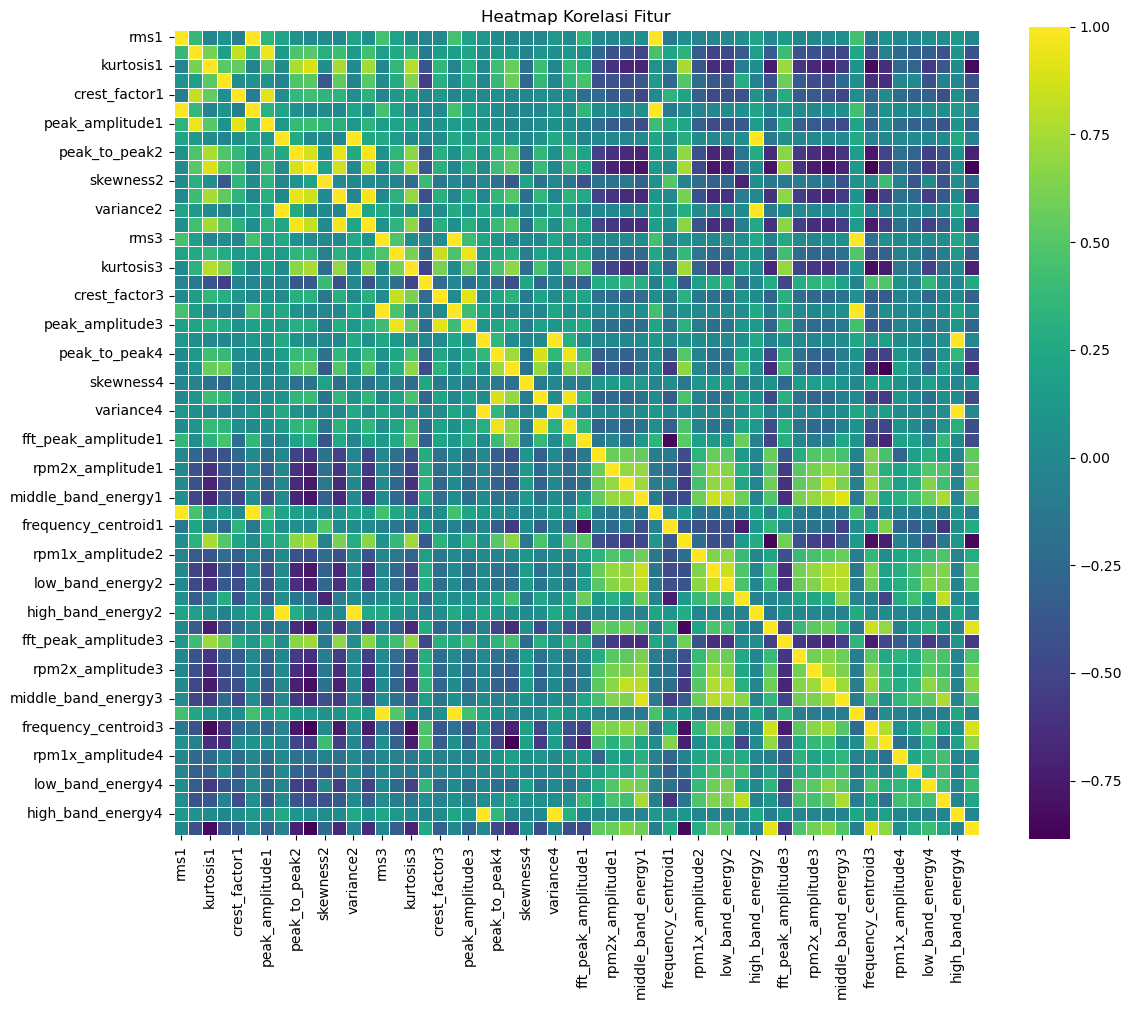

In [23]:
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix,
    cmap="viridis",     
    annot=False,
    square=True,
    linewidths=0.5
)
plt.title("Heatmap Korelasi Fitur")
plt.tight_layout()
plt.show()

Pada heatmap tersebut, tidak semua fitur dapat ditampilkan. Untuk mengeliminasi fitur yang redundant, digunakan ambang korelasi sebagai batas tingkat redundansi yang masih dianggap wajar. Jika terdapat beberapa fitur yang saling berkorelasi tinggi, maka dipilih satu fitur perwakilan, yaitu fitur yang memiliki korelasi tinggi dengan fitur lain paling sedikit, sehingga informasi yang dipertahankan tetap beragam.

In [24]:
corr_matrix

,rms1,peak_to_peak1,kurtosis1,skewness1,crest_factor1,variance1,peak_amplitude1,rms2,peak_to_peak2,kurtosis2,...,middle_band_energy3,high_band_energy3,frequency_centroid3,fft_peak_amplitude4,rpm1x_amplitude4,rpm2x_amplitude4,low_band_energy4,middle_band_energy4,high_band_energy4,frequency_centroid4
rms1,1.000000,0.378084,-0.028779,0.089522,-0.075417,0.999380,0.334934,0.211566,0.062536,0.010881,...,0.034641,0.433194,-0.124519,0.057573,-0.013534,-0.018399,0.031441,0.042400,0.112007,-0.008523
peak_to_peak1,0.378084,1.000000,0.613454,0.168218,0.834977,0.371584,0.943986,0.136467,0.472003,0.509943,...,-0.500183,0.237221,-0.421273,-0.070237,-0.234385,-0.310973,-0.328699,-0.412286,0.084258,-0.417497
kurtosis1,-0.028779,0.613454,1.000000,0.520886,0.547688,-0.038685,0.506820,0.024537,0.763601,0.885398,...,-0.580714,0.071082,-0.837267,-0.622222,-0.251101,-0.283522,-0.566015,-0.374723,0.026212,-0.829362
skewness1,0.089522,0.168218,0.520886,1.000000,0.044780,0.083911,0.078867,-0.039986,0.479270,0.512000,...,-0.230441,0.048151,-0.634874,-0.633774,-0.022500,0.002841,-0.405454,-0.050534,-0.005771,-0.405327
crest_factor1,-0.075417,0.834977,0.547688,0.044780,1.000000,-0.080704,0.913372,0.030607,0.370576,0.428260,...,-0.493818,0.042168,-0.274076,0.007200,-0.221099,-0.306193,-0.296886,-0.431844,0.033351,-0.335157
variance1,0.999380,0.371584,-0.038685,0.083911,-0.080704,1.000000,0.329496,0.210494,0.053979,0.001308,...,0.042472,0.432173,-0.115986,0.062338,-0.008706,-0.014379,0.038372,0.048517,0.110785,-0.000560
peak_amplitude1,0.334934,0.943986,0.506820,0.078867,0.913372,0.329496,1.000000,0.121247,0.378503,0.410151,...,-0.454892,0.214967,-0.309295,0.030099,-0.215857,-0.297333,-0.269412,-0.392867,0.079697,-0.320611
rms2,0.211566,0.136467,0.024537,-0.039986,0.030607,0.210494,0.121247,1.000000,0.260691,0.007563,...,0.002881,0.251852,-0.033365,-0.020349,0.003315,0.004994,-0.006490,0.020756,0.248347,-0.051756
peak_to_peak2,0.062536,0.472003,0.763601,0.479270,0.370576,0.053979,0.378503,0.260691,1.000000,0.874966,...,-0.597683,0.157197,-0.768804,-0.505803,-0.188649,-0.283238,-0.535941,-0.385963,0.088556,-0.712924
kurtosis2,0.010881,0.509943,0.885398,0.512000,0.428260,0.001308,0.410151,0.007563,0.874966,1.000000,...,-0.689119,0.109143,-0.885363,-0.569451,-0.206368,-0.357814,-0.585740,-0.453515,0.031760,-0.874035


Fitur redundant dengan korelasi ≥ 0,85 dieliminasi dan digantikan oleh satu fitur perwakilan

In [25]:
import pandas as pd

def correlation_table_from_matrix(corr_matrix, threshold=0.7):
    rows = []

    for feature in corr_matrix.columns:
        high_corr = corr_matrix.loc[feature]

        related = high_corr[
            (high_corr.abs() >= threshold) &
            (high_corr.index != feature)
        ].index.tolist()

        rows.append({
            "fitur": feature,
            "korelasi_dengan": ", ".join(related) if related else "-",
            "jumlah_korelasi": len(related)
        })

    df_result = pd.DataFrame(rows)
    df_result = df_result.sort_values(
        by="jumlah_korelasi",
        ascending=True
    ).reset_index(drop=True)

    return df_result


In [26]:
table_corr = correlation_table_from_matrix(
    corr_matrix,
    threshold=0.85
)

In [27]:
table_corr

,fitur,korelasi_dengan,jumlah_korelasi
0,rpm1x_amplitude2,-,0
1,fft_peak_amplitude3,-,0
2,rpm1x_amplitude3,-,0
3,rpm2x_amplitude3,-,0
4,fft_peak_amplitude2,-,0
5,skewness3,-,0
6,kurtosis3,-,0
7,low_band_energy2,-,0
8,low_band_energy3,-,0
9,fft_peak_amplitude1,-,0


In [28]:
import pandas as pd

def representative_feature_table(df_corr_table):
    eliminated = set()
    rows = []

    for _, row in df_corr_table.iterrows():
        feature = row["fitur"]

        if feature in eliminated:
            continue

        # Ambil korelasi_dengan
        s = str(row["korelasi_dengan"]).strip()
        if s == "-" or s == "" or s.lower() == "nan":
            correlated = []
        else:
            correlated = [x.strip() for x in s.split(",") if x.strip()]

        eliminated_now = [f for f in correlated if f not in eliminated]

        # Tandai sebagai dieliminasi
        eliminated.update(eliminated_now)

        rows.append({
            "fitur": feature,
            "korelasi": ", ".join(correlated) if correlated else "-",
            "fitur_tereliminasi": ", ".join(eliminated_now) if eliminated_now else "-"
        })

    return pd.DataFrame(rows)

In [29]:
df_rep = representative_feature_table(table_corr)
df_rep

,fitur,korelasi,fitur_tereliminasi
0,rpm1x_amplitude2,-,-
1,fft_peak_amplitude3,-,-
2,rpm1x_amplitude3,-,-
3,rpm2x_amplitude3,-,-
4,fft_peak_amplitude2,-,-
5,skewness3,-,-
6,kurtosis3,-,-
7,low_band_energy2,-,-
8,low_band_energy3,-,-
9,fft_peak_amplitude1,-,-


Mengeliminasi fitur 

In [30]:
import re
eliminated_features = []
for item in df_rep["fitur_tereliminasi"]:
    if item is None or str(item).strip() in ["-", "", "nan"]:
        continue

    parts = re.split(r"\s*,\s*", str(item))
    eliminated_features.extend(parts)

# Optional: buang duplikat
eliminated_features = sorted(set(eliminated_features))
print(eliminated_features)

['crest_factor2', 'crest_factor4', 'frequency_centroid4', 'high_band_energy1', 'kurtosis2', 'kurtosis4', 'middle_band_energy3', 'peak_amplitude1', 'peak_amplitude3', 'peak_to_peak2', 'peak_to_peak4', 'rms2', 'rms3', 'rms4', 'variance1', 'variance2', 'variance3', 'variance4']


In [31]:
df_hasil_matrix = df_all_fitur.drop(columns=eliminated_features)
df_hasil_matrix

,rms1,peak_to_peak1,kurtosis1,skewness1,crest_factor1,skewness2,peak_amplitude2,peak_to_peak3,kurtosis3,skewness3,...,rpm2x_amplitude3,low_band_energy3,high_band_energy3,frequency_centroid3,fft_peak_amplitude4,rpm1x_amplitude4,rpm2x_amplitude4,low_band_energy4,middle_band_energy4,high_band_energy4
0,0.981876,8.305892,4.423996,0.042268,4.340398,0.319323,4.415968,7.116645,3.454610,0.008077,...,0.002838,0.000720,1.953960,2197.971516,0.782114,0.005563,0.007621,0.001358,0.012536,1.860018
1,0.991872,8.305892,4.302017,0.047775,4.296657,0.276605,4.415968,7.129375,3.652878,-0.001170,...,0.004296,0.000619,1.964437,2181.784674,0.784928,0.004328,0.005894,0.001196,0.011679,1.831185
2,1.008603,8.305892,4.415494,0.038160,4.225383,0.259941,4.302304,7.298063,3.694063,0.016447,...,0.003801,0.001268,2.044201,2170.952849,0.779295,0.005908,0.005479,0.002033,0.012775,1.837013
3,0.983682,8.305892,4.538889,0.059166,4.332431,0.294124,4.302304,7.298063,3.641216,0.017561,...,0.004253,0.000713,1.963752,2181.773072,0.775786,0.002533,0.003605,0.001428,0.013151,1.853072
4,0.983058,7.685130,4.313403,0.044689,4.306242,0.220683,4.262715,6.928977,3.538691,0.024571,...,0.003786,0.000800,2.010793,2170.953775,0.779577,0.002758,0.003102,0.001184,0.012589,1.851232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32980,0.976982,6.972535,3.320791,-0.028494,3.702667,0.016935,3.894216,7.021323,3.049416,0.005070,...,0.016599,0.006038,1.763289,3473.476901,1.084913,0.003003,0.008286,0.004407,0.022970,1.939698
32981,0.965918,6.972535,3.340193,-0.033370,3.745081,0.062429,3.921678,6.511159,2.939962,0.021111,...,0.004675,0.007877,1.800905,3413.897253,1.090535,0.003086,0.004186,0.003952,0.023449,1.936681
32982,1.016611,6.972535,3.162458,0.008160,3.558334,0.030762,3.921678,6.511159,2.955513,0.037396,...,0.014300,0.006642,1.836053,3364.174101,1.043491,0.002173,0.009078,0.003693,0.026192,1.879970
32983,1.033329,6.938739,3.070035,-0.055299,3.622937,0.071479,3.921678,6.336612,2.887954,0.027650,...,0.017175,0.007382,1.995130,3343.634058,1.079422,0.001968,0.005166,0.004656,0.028315,1.991710


Dengan ambang korelasi 0,85, dilakukan reduksi fitur untuk menghilangkan fitur yang bersifat redundant (memiliki informasi yang sama). Hasilnya, beberapa fitur dieliminasi karena sudah diwakili oleh fitur lain, antara lain: middle_band_energy3 diwakili middle_band_energy1, peak_amplitude1 dan peak_amplitude3 diwakili crest_factor1 dan crest_factor3, frequency_centroid4 diwakili frequency_centroid2, serta kurtosis4 diwakili fft_peak_amplitude4. Selain itu, pada tiap channel terdapat pasangan fitur yang sangat berkorelasi seperti RMS dan variansi, sehingga fitur-fitur tersebut dieliminasi dan diwakili oleh fitur energi pita tinggi (high_band_energy2–4) atau rms1 sesuai hasil seleksi. Fitur yang tidak menunjukkan korelasi tinggi pada ambang tersebut tetap dipertahankan karena dianggap memberikan informasi yang berbeda.

#### 1. PCA
tujuan:
Menetukan Struktur data untuk mengetahui keterpisahan kelas

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_pca = df_hasil_matrix.copy()

In [33]:
df_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32985 entries, 0 to 32984
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   rms1                 32985 non-null  float64
 1   peak_to_peak1        32985 non-null  float64
 2   kurtosis1            32985 non-null  float64
 3   skewness1            32985 non-null  float64
 4   crest_factor1        32985 non-null  float64
 5   skewness2            32985 non-null  float64
 6   peak_amplitude2      32985 non-null  float64
 7   peak_to_peak3        32985 non-null  float64
 8   kurtosis3            32985 non-null  float64
 9   skewness3            32985 non-null  float64
 10  crest_factor3        32985 non-null  float64
 11  skewness4            32985 non-null  float64
 12  peak_amplitude4      32985 non-null  float64
 13  label                32985 non-null  object 
 14  fft_peak_amplitude1  32985 non-null  float64
 15  rpm1x_amplitude1     32985 non-null 

In [34]:
df_pca

,rms1,peak_to_peak1,kurtosis1,skewness1,crest_factor1,skewness2,peak_amplitude2,peak_to_peak3,kurtosis3,skewness3,...,rpm2x_amplitude3,low_band_energy3,high_band_energy3,frequency_centroid3,fft_peak_amplitude4,rpm1x_amplitude4,rpm2x_amplitude4,low_band_energy4,middle_band_energy4,high_band_energy4
0,0.981876,8.305892,4.423996,0.042268,4.340398,0.319323,4.415968,7.116645,3.454610,0.008077,...,0.002838,0.000720,1.953960,2197.971516,0.782114,0.005563,0.007621,0.001358,0.012536,1.860018
1,0.991872,8.305892,4.302017,0.047775,4.296657,0.276605,4.415968,7.129375,3.652878,-0.001170,...,0.004296,0.000619,1.964437,2181.784674,0.784928,0.004328,0.005894,0.001196,0.011679,1.831185
2,1.008603,8.305892,4.415494,0.038160,4.225383,0.259941,4.302304,7.298063,3.694063,0.016447,...,0.003801,0.001268,2.044201,2170.952849,0.779295,0.005908,0.005479,0.002033,0.012775,1.837013
3,0.983682,8.305892,4.538889,0.059166,4.332431,0.294124,4.302304,7.298063,3.641216,0.017561,...,0.004253,0.000713,1.963752,2181.773072,0.775786,0.002533,0.003605,0.001428,0.013151,1.853072
4,0.983058,7.685130,4.313403,0.044689,4.306242,0.220683,4.262715,6.928977,3.538691,0.024571,...,0.003786,0.000800,2.010793,2170.953775,0.779577,0.002758,0.003102,0.001184,0.012589,1.851232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32980,0.976982,6.972535,3.320791,-0.028494,3.702667,0.016935,3.894216,7.021323,3.049416,0.005070,...,0.016599,0.006038,1.763289,3473.476901,1.084913,0.003003,0.008286,0.004407,0.022970,1.939698
32981,0.965918,6.972535,3.340193,-0.033370,3.745081,0.062429,3.921678,6.511159,2.939962,0.021111,...,0.004675,0.007877,1.800905,3413.897253,1.090535,0.003086,0.004186,0.003952,0.023449,1.936681
32982,1.016611,6.972535,3.162458,0.008160,3.558334,0.030762,3.921678,6.511159,2.955513,0.037396,...,0.014300,0.006642,1.836053,3364.174101,1.043491,0.002173,0.009078,0.003693,0.026192,1.879970
32983,1.033329,6.938739,3.070035,-0.055299,3.622937,0.071479,3.921678,6.336612,2.887954,0.027650,...,0.017175,0.007382,1.995130,3343.634058,1.079422,0.001968,0.005166,0.004656,0.028315,1.991710


In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df = df_pca.copy()

if df.index.name == "label":
    df = df.reset_index()

label_col = "label"

X = df.drop(columns=[label_col], errors="ignore").select_dtypes(include=["number"])
y = df[label_col] if label_col in df.columns else None

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

n_samples, n_features = X_scaled.shape
n_components = min(2, n_samples, n_features)

pca = PCA(n_components=n_components, random_state=42)
X_pca = pca.fit_transform(X_scaled)

var_ratio = pca.explained_variance_ratio_
for i, vr in enumerate(var_ratio, start=1):
    print(f"Explained variance PC{i}: {vr:.4f}")
print(f"Total explained: {var_ratio.sum():.4f}")

# Buat DF hasil PCA
cols = [f"PC{i}" for i in range(1, n_components + 1)]
df_pca_out = pd.DataFrame(X_pca, columns=cols)
if y is not None:
    df_pca_out[label_col] = y.values


Explained variance PC1: 0.3586
Explained variance PC2: 0.1601
Total explained: 0.5187


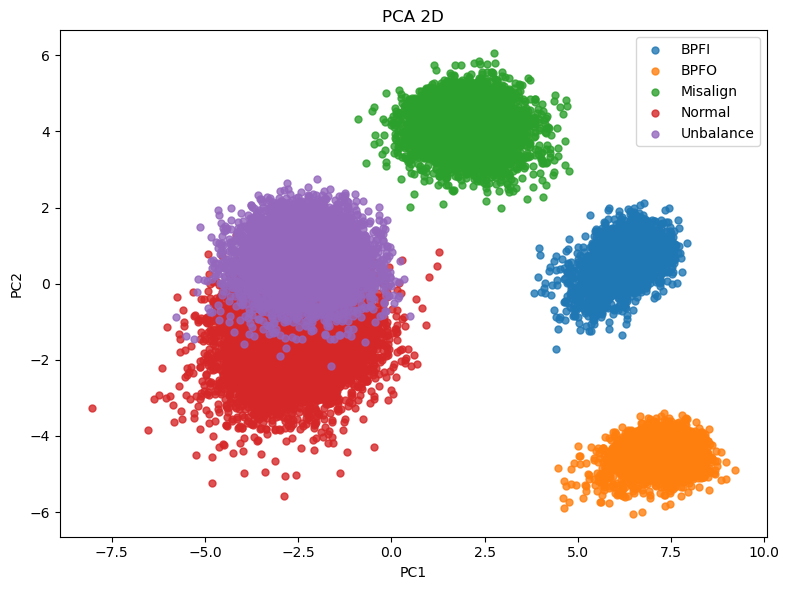

In [36]:
plt.figure(figsize=(8, 6))
if y is None:
    plt.scatter(df_pca_out["PC1"], df_pca_out["PC2"])
else:
    for lab in sorted(df_pca_out[label_col].unique()):
        sub = df_pca_out[df_pca_out[label_col] == lab]
        plt.scatter(sub["PC1"], sub["PC2"], label=lab, alpha=0.8, s=25)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA 2D")
if y is not None:
    plt.legend()
plt.tight_layout()
plt.show()

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df = df_pca.copy()

if df.index.name == "label":
    df = df.reset_index()

label_col = "label"

X = df.drop(columns=[label_col], errors="ignore").select_dtypes(include=["number"])
y = df[label_col] if label_col in df.columns else None

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

n_samples, n_features = X_scaled.shape
n_components = min(3, n_samples, n_features)

pca = PCA(n_components=n_components, random_state=42)
X_pca = pca.fit_transform(X_scaled)

var_ratio = pca.explained_variance_ratio_
for i, vr in enumerate(var_ratio, start=1):
    print(f"Explained variance PC{i}: {vr:.4f}")
print(f"Total explained: {var_ratio.sum():.4f}")

# Buat DF hasil PCA
cols = [f"PC{i}" for i in range(1, n_components + 1)]
df_pca_out = pd.DataFrame(X_pca, columns=cols)
if y is not None:
    df_pca_out[label_col] = y.values




Explained variance PC1: 0.3586
Explained variance PC2: 0.1601
Explained variance PC3: 0.0583
Total explained: 0.5770


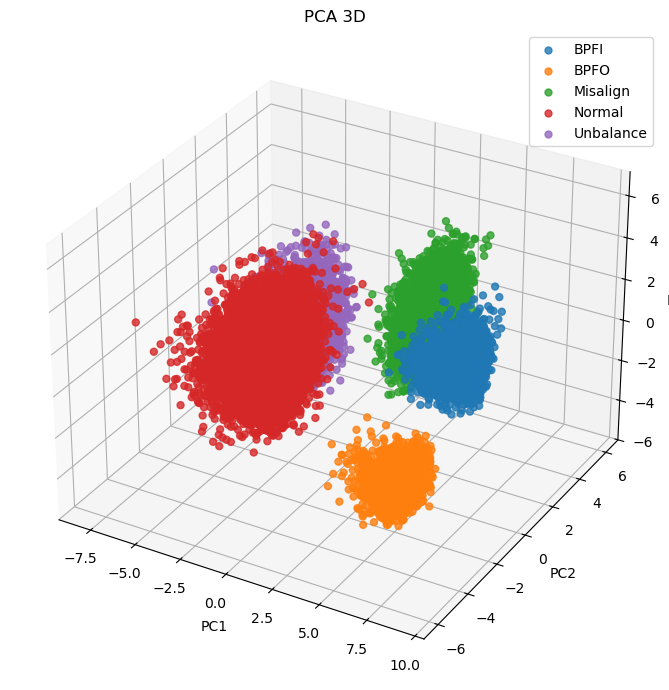

In [38]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401

fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111, projection="3d")

if y is None:
    ax.scatter(df_pca_out["PC1"], df_pca_out["PC2"], df_pca_out["PC3"])
else:
    for lab in sorted(df_pca_out[label_col].unique()):
        sub = df_pca_out[df_pca_out[label_col] == lab]
        ax.scatter(sub["PC1"], sub["PC2"], sub["PC3"], label=lab, alpha=0.8, s=25)

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("PCA 3D")
if y is not None:
    ax.legend()
plt.tight_layout()
plt.show()

In [39]:
import plotly.express as px

fig = px.scatter_3d(
    df_pca_out,
    x="PC1",
    y="PC2",
    z="PC3",
    color=label_col if y is not None else None,
    opacity=0.8,
    title="PCA 3D (Interactive)"
)
fig.update_traces(marker=dict(size=4))
fig.show(renderer="browser")


![alt text](webplot/tress8.5.png)

Berdasarkan hasil visualisasi PCA dua dimensi, sebagian besar kelas telah menunjukkan pemisahan yang cukup jelas, seperti kelas BPFI, BPFO, dan Misalign yang membentuk klaster terpisah. Namun, kelas Normal dan Unbalance masih terlihat saling tumpang tindih pada ruang PC1–PC2. Pada visualisasi PCA tiga dimensi, pola pemisahan antar kelas secara umum masih konsisten dengan hasil PCA dua dimensi, di mana masing-masing kelas membentuk klaster pada lokasi yang berbeda. Meskipun demikian, tumpang tindih antara kelas Normal dan Unbalance masih terlihat pada beberapa bagian ruang PCA. Hal ini menunjukkan bahwa fitur yang digunakan saat ini sudah cukup baik dalam membedakan sebagian besar jenis kondisi, tetapi belum sepenuhnya mampu merepresentasikan perbedaan karakteristik antara kondisi Normal dan Unbalance yang memiliki pola getaran yang relatif mirip. Oleh karena itu, diperlukan pengayaan fitur atau pendekatan pemodelan lanjutan untuk meningkatkan separabilitas kedua kelas tersebut.

### Lampiran

#### Uji coba menentukan threshold korelasi pada heatmap

Telah dilakukan beberapa percobaan nilai threshold, dan hasil yang paling ideal diperoleh pada threshold 8,5, karena pada nilai tersebut pemisahan antar kelas sudah cukup baik serta mampu menggunakan jumlah fitur yang lebih sedikit dibandingkan dengan threshold di atas 8,5.  

Threshold = 8
![alt text](webplot/tress8.png)
Threshold = 8.5
![alt text](webplot/tress8.5.png)
Threshold = 9
![alt text](webplot/tres9.png)
Threshold = 9.5
![alt text](webplot/tres9.5.png)